In [1]:
import numpy as np
import sys,os,json
from collections import Counter
import glob
from itertools import chain
import networkx as nx
from plotter_lib import *

#import matplotlib.pyplot as plt



In [2]:
arxs_S0 = glob.glob("game2/team1/S0*")
arxs_S1 = glob.glob("game2/team1/S1*")

Busco jugadores que esten en todas las redes

In [3]:
def get_lista_jugadores(arxs):

    def f(arx):
        d = json.load(open(arx,'r' ))
        links = list(d.keys())
        return list( map( lambda link: link.split('_'), links ) )

    l1 = list(chain.from_iterable(list(map( f , arxs))) )
    l2 = sorted(set(list(chain.from_iterable(l1) ) ), key= lambda s: int(s.split("r")[-1]))

    return(l2)

j0 = get_lista_jugadores(arxs_S0)
j1 = get_lista_jugadores(arxs_S1)

players = sorted(set(j0).intersection(set(j1)), key= lambda s: int(s.split("r")[-1]) )

Calculo de metricas de las redes S0

In [29]:

def get_undirected_edgelist(d):

    red={}
    seen=set()
    
    for players, w in d.items():
        n1, n2 = players.split('_')
        

        if (n1,n2) not in seen:

            if (n2,n1) not in seen:

                seen.add((n1,n2))

                red[(n1,n2)]=w

            else:
                red[(n2,n1)]+=w

        else:
            red[(n1,n2)]+=w
    # ------------------------------------------
    
    
    return [ "%s %s {'weight':%d}" % (nodos[0],nodos[1],w) for nodos,w in red.items() ]

def get_directed_edgelist(d):

    red=[]
    
    for players, w in d.items():
        n1, n2 = players.split('_')
        red.append("%s %s {'weight':%d}" %(n1,n2,w))

    
    return red


In [30]:
data0 = {  player:{ "c":[],"ec":[], "bc":[] } for player in players  }

for arx in arxs_S0:

    print (arx)

    edgelist = get_undirected_edgelist( json.load(open(arx,'r')) )

    G = nx.parse_edgelist(edgelist, nodetype = str)
        
    
    # clustering
    c= nx.clustering(G, weight="weight")
    
    # centralidad 
    ec = nx.eigenvector_centrality(G, weight="weight")
    
    bc = nx.betweenness_centrality(G, weight="weight")

    for player in players:

        try:
            data0[player]['c'].append( c[player] )

            data0[player]['ec'].append( ec[player] )

            data0[player]['bc'].append( bc[player] )
        except:
            None


print (data0)


game2/team1/S0_4470.json
game2/team1/S0_3447.json
game2/team1/S0_2534.json
game2/team1/S0_740.json
game2/team1/S0_5442.json
game2/team1/S0_2121.json
game2/team1/S0_5302.json
game2/team1/S0_3606.json
game2/team1/S0_2590.json
game2/team1/S0_4600.json
{'Player1': {'c': [0.3749012647363634, 0.34393415220390305, 0.4440902135805424, 0.11814083235404829, 0.21455976774827598, 0, 0.1614044362080406, 0.22949215459134778, 0.4440902135805424, 0.3749012647363634], 'ec': [0.2676372022508205, 0.37033080603566926, 0.4244361577649489, 0.22058455958485346, 0.1685819283445425, 0.05383693343621988, 0.19917733167030302, 0.24891782240030244, 0.42313131358472583, 0.2676372022508205], 'bc': [0.0, 0.0, 0.013888888888888888, 0.262037037037037, 0.03666666666666667, 0.0, 0.1015873015873016, 0.0, 0.0324074074074074, 0.0]}, 'Player2': {'c': [0, 0.2948977884192418, 0.46257032537779763, 0.20990002940011798, 0.20998684164914552, 0.059996240471184424, 0, 0.15164498450005123, 0.46257032537779763, 0], 'ec': [0.0321561336

Calculo de metricas para S1

In [31]:
data1 = {  player:{ "c":[],"ec":[], "bc":[] } for player in players  }

for arx in arxs_S1:

    print (arx)

    edgelist = get_undirected_edgelist( json.load(open(arx,'r')) )

    G = nx.parse_edgelist(edgelist, nodetype = str)
        
    
    # clustering
    c= nx.clustering(G, weight="weight")
    
    # centralidad 
    ec = nx.eigenvector_centrality(G, weight="weight")
    
    bc = nx.betweenness_centrality(G, weight="weight")

    for player in players:

        try:
            data1[player]['c'].append( c[player] )

            data1[player]['ec'].append( ec[player] )

            data1[player]['bc'].append( bc[player] )
        except:
            None


print (data1)

game2/team1/S1_1190.json
game2/team1/S1_4841.json
game2/team1/S1_1093.json
game2/team1/S1_2682.json
game2/team1/S1_2243.json
game2/team1/S1_3955.json
game2/team1/S1_4688.json
game2/team1/S1_659.json
game2/team1/S1_488.json
game2/team1/S1_5595.json
game2/team1/S1_4973.json
{'Player1': {'c': [0.1834404027163681, 0.2715628015441625, 0.19723386019870787, 0.23613480420992616, 0.14885342253960498, 0.17579327387280913, 0.2449790513550314, 0.11814083235404829, 0.15470461213593129, 0.1696303406945172, 0.3753960127240147], 'ec': [0.19701839624519338, 0.4001819852676246, 0.2704271489092145, 0.2141400874514356, 0.15863576494173434, 0.2549900407701763, 0.32600773681150413, 0.2143257954166605, 0.2656357101208176, 0.1695152777754525, 0.40797468870658193], 'bc': [0.1597222222222222, 0.0, 0.060185185185185175, 0.009259259259259259, 0.0, 0.2, 0.07407407407407407, 0.2731481481481481, 0.18749999999999997, 0.02962962962962963, 0.0]}, 'Player2': {'c': [0.28238473118027824, 0.09614997135382723, 0.29065977944

In [38]:
json.dump(data1, open("player_metrica_S1.json","w"))

Plots

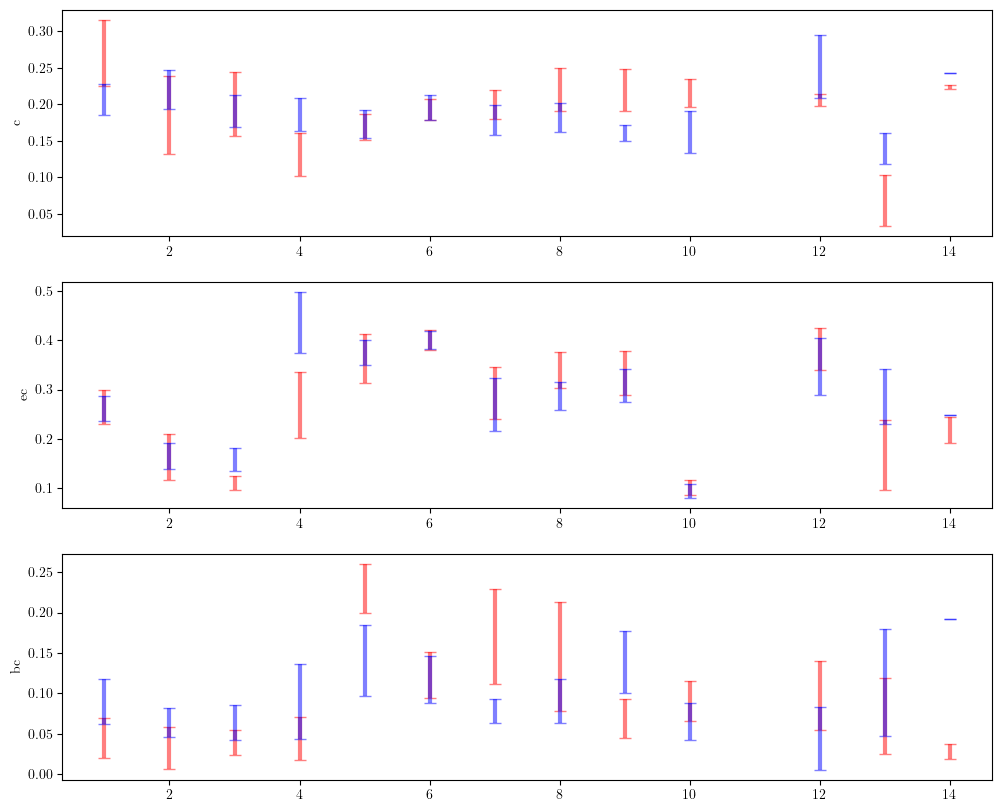

In [39]:

player2n = { p:int(p.split('r')[-1]) for p in players }
z_alpha = 1#1.96

fig,ax = plt.subplots(3,1, figsize=(12,10))

for i, metrica in enumerate(['c','ec','bc']):


    x,y0,y1, err0, err1, = [],[],[],[],[]

    for player in players:

        n0, n1 =  len(data0[player][metrica])  , len(data1[player][metrica]) 
        mu0, mu1 = np.mean(data0[player][metrica])  , np.mean(data1[player][metrica]) 
        sd0, sd1 = np.std(data0[player][metrica])  , np.std(data1[player][metrica]) 


        x.append( player2n[player]  )  
        y0.append( mu0 )
        y1.append( mu1 )

        err0.append( sd0*z_alpha/np.sqrt(n0) )
        err1.append( sd1*z_alpha/np.sqrt(n1) )


    ax[i].errorbar(x, y0, err0, c='red', linewidth=0, alpha=0.5 ,elinewidth=3,capsize=4) 

    ax[i].errorbar(x, y1, err1, c='blue', linewidth=0, alpha=0.5,elinewidth=3,capsize=4)

    ax[i].set_ylabel(metrica)

plt.show()



In [33]:
y1

[0.09031986531986531,
 0.06408489658489659,
 0.06364478114478114,
 0.09007936507936508,
 0.14106344833617565,
 0.11716559534741354,
 0.07778094800822072,
 0.09068867243867243,
 0.13894562508198868,
 0.06576599326599325,
 0.044444444444444446,
 0.11327681577681578,
 0.1918518518518518]